In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/evajnewby/eds220-hwk3.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


Oil spills data: Contains petroleum and hazardous material spill data for New York State. This data must be reported under US law and includes detailed information. Accessed November 2, 2024, last updated November 2, 2024. 

TIGER shapefile: Include census information and geographic identifiers for each geoid. Also contains demographic data. Accessed November 2, 2024. 

## 3. Import libraries

In [2]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import date
import numpy as np

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Get current working directory
os.getcwd()

'/Users/ejnewby/MEDS/EDS-220/eds220-hwk3'

In [4]:
# Import NY spills data
spills = pd.read_csv('data/Spill_Incidents_20241102.csv')

In [6]:
# Import counties data
fp = os.path.join('/', 'Users', 'ejnewby', 'MEDS', 'EDS-220', 'eds220-hwk3', 'data','tl_2022_us_county.shp')
counties = gpd.read_file(fp)

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [7]:
# a. spills head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [8]:
# b.Column data types of spills
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [9]:
# c. Check the unique values in the material_family column.
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [10]:
# d. Check the unique values in the county column.
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

I was able to get a better idea of the data that I will be working with for this assignment. I especially noticed how the date columns are not stored as dates, they are stored as objects. 

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [11]:
# a. Simplify column names
spills.columns = spills.columns.str.lower().str.replace(' ', '_')

In [12]:
# View changes
spills.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [13]:
# b. Update 'date' column datatype
spills['spill_date'] = pd.to_datetime(spills['spill_date'])
spills['received_date'] = pd.to_datetime(spills['received_date'])
spills['close_date'] = pd.to_datetime(spills['close_date'])

In [14]:
# View changes
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [15]:
# a. Make a subset of petroleum spills with specified date range: 
# Specified date range
petr_23 = spills[(spills['spill_date'] >= '2023-01-01') & (spills['spill_date'] <= '2023-10-31')]

# Subset of petroleum spills
petr_23 = petr_23.loc[spills['material_family'] == 'Petroleum']

# reset index:
spills = spills.reset_index(drop=True)
petr_23 = petr_23.reset_index(drop=True)

# Check data frame
petr_23.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,diesel,Petroleum,0.0,NaN,0.0
1,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,#2 fuel oil,Petroleum,0.0,Gallons,0.0
2,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,gasoline,Petroleum,0.0,NaN,0.0
3,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,kerosene [#1 fuel oil] (on-site consumption),Petroleum,0.0,NaN,0.0
4,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0


<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [16]:
# b. using f strings to print a verification message:
print(f"petr_23 years: {petr_23['spill_date'].dt.year.unique()}")
print(f"petr_23 months: {petr_23['spill_date'].dt.month.unique()}")

petr_23 years: [2023]
petr_23 months: [ 6  8  9  7  1  2  3 10  5  4]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [17]:
# c. Confirm data only for petroleum spills
assert(petr_23['material_family'] == 'Petroleum').all()

print("All data is for petroleum")

All data is for petroleum


<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [18]:
# Group by county, count reports, reset index
spills_per_county = petr_23.groupby('county').size().reset_index(name = 'n_spills')

# check data frame
spills_per_county.head()

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [19]:
# a. First five rows
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [20]:
# b. Check data types of each column
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [21]:
# c. check CRS
print(counties.crs)

EPSG:4269


In [22]:
# Check geometry
counties['geometry']

0       POLYGON ((-96.55515 41.91587, -96.55515 41.914...
1       POLYGON ((-123.72755 46.26449, -123.72755 46.2...
2       POLYGON ((-104.89337 34.08894, -104.89337 34.0...
3       POLYGON ((-96.68493 40.52330, -96.69219 40.523...
4       POLYGON ((-98.27370 40.11840, -98.27374 40.122...
                              ...                        
3230    POLYGON ((-84.30237 34.57832, -84.30329 34.577...
3231    POLYGON ((-95.25857 48.88666, -95.25707 48.885...
3232    POLYGON ((-90.14883 32.40026, -90.14890 32.400...
3233    POLYGON ((-101.18138 32.21252, -101.18138 32.2...
3234    POLYGON ((-82.30872 38.28106, -82.30874 38.280...
Name: geometry, Length: 3235, dtype: geometry

<Axes: >

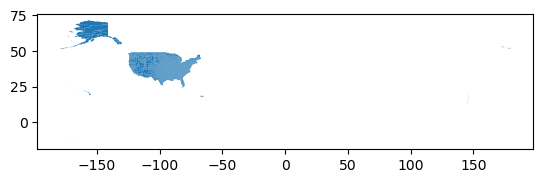

In [23]:
# d. Plot
counties.plot()

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

One of the most important things about the preliminary data exploration (to me) is identifying the crs for plotting. I can also observe from the preliminary plot that the extend is not zoomed to the 50 states, but also includes territories.

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [24]:
# Simplify column names
# Replace blank spaces
counties.columns = counties.columns.str.replace(" ", "_")

# Convert to lower case
counties.columns = counties.columns.str.lower()

# View changes
counties.head(3)

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."


### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<Axes: >

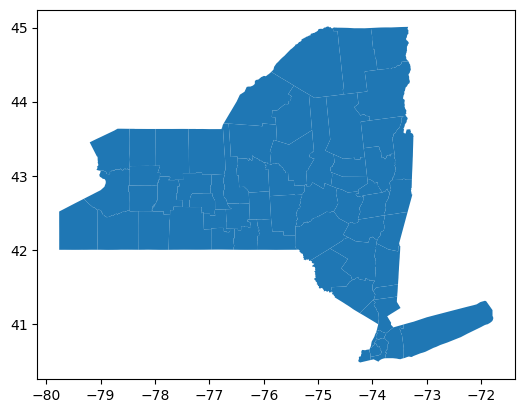

In [25]:
# Subset counties in state of NY
ny_counties = counties[counties['statefp'] == '36']

# View subset
ny_counties.head()

# Plot
ny_counties.plot()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [26]:
# a. View names of counties in ny_counties
ny_counties['name'].unique

<bound method Series.unique of 46          Steuben
165        Saratoga
173        Allegany
203          Oswego
210          Ulster
           ...     
2936     Livingston
2963       Delaware
3157         Orange
3158    Schenectady
3164          Bronx
Name: name, Length: 62, dtype: object>

In [27]:
# b. View names of counties in spills_per_county
spills_per_county['county'].unique 

<bound method Series.unique of 0          Albany
1        Allegany
2           Bronx
3          Broome
4     Cattaraugus
         ...     
59     Washington
60          Wayne
61    Westchester
62        Wyoming
63          Yates
Name: county, Length: 64, dtype: object>



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [28]:
# Convert types to str
spills_per_county_str = spills_per_county['county'].astype(str).values
ny_counties_str = ny_counties['name'].astype(str).values

# County names in spills_per_county and not ny_counties
diff_names_spills = np.setdiff1d(spills_per_county_str, ny_counties_str)
diff_names_spills

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [29]:
# County names in ny_counties and not spills_per_county
diff_names_ny = np.setdiff1d(ny_counties_str, spills_per_county_str)
diff_names_ny

array(['St. Lawrence'], dtype=object)




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [30]:
# Number of spills in Tuscarora Indian Reservation
spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation'].sum()

county      Tuscarora Indian Reservation
n_spills                               1
dtype: object

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [31]:
# Add period to St Lawrence
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', "St. Lawrence")

# Asser statement to verify
assert 'St. Lawrence' in spills_per_county['county'].values

print("period added")

period added


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [32]:
# a. Make a copy of the data frame
ny_counties = ny_counties.copy()

# Change ny_counties 'name' column to 'county'
ny_counties.rename(columns = {'name':'county'}, inplace = True)

# View changes
ny_counties.head()

,statefp,countyfp,countyns,geoid,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."


In [33]:
# b. Inner join
ny_counties = pd.merge(spills_per_county, ny_counties, how = 'inner', on = 'county')

# View join
ny_counties

,county,n_spills,statefp,countyfp,countyns,geoid,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,Albany,205,36,001,00974099,36001,Albany County,06,H1,G4020,None,None,None,A,1354273421,26971925,+42.5882401,-073.9740095,"POLYGON ((-73.96379 42.44162, -73.96666 42.441..."
1,Allegany,30,36,003,00974100,36003,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
2,Bronx,143,36,005,00974101,36005,Bronx County,06,H6,G4020,None,None,None,C,109235674,39353304,+40.8487111,-073.8529390,"POLYGON ((-73.93381 40.88221, -73.93365 40.882..."
3,Broome,75,36,007,00974102,36007,Broome County,06,H1,G4020,None,None,None,A,1827626589,25078245,+42.1619773,-075.8302833,"POLYGON ((-75.74223 41.99805, -75.75080 41.997..."
4,Cattaraugus,47,36,009,00974103,36009,Cattaraugus County,06,H1,G4020,None,None,None,A,3388125876,36783591,+42.2390986,-078.6623320,"POLYGON ((-78.69725 41.99867, -78.69881 41.998..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Washington,96,36,115,00974155,36115,Washington County,06,H1,G4020,None,None,None,A,2152773115,38123568,+43.3123766,-073.4394282,"POLYGON ((-73.26504 43.10615, -73.26504 43.106..."
58,Wayne,38,36,117,00974156,36117,Wayne County,06,H1,G4020,None,None,None,A,1563913376,2018184723,+43.2181139,-077.0494024,"POLYGON ((-76.70573 43.13143, -76.70561 43.129..."
59,Westchester,743,36,119,00974157,36119,Westchester County,06,H1,G4020,None,None,None,A,1115811940,179391718,+41.1526862,-073.7457526,"POLYGON ((-73.65762 40.98550, -73.65739 40.985..."
60,Wyoming,24,36,121,00974158,36121,Wyoming County,06,H1,G4020,None,None,None,A,1535219438,9158067,+42.7013627,-078.2285667,"POLYGON ((-77.95538 42.71371, -77.95537 42.713..."



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [34]:
# c. Check current spill amounts for Niagara county
spill_amounts = ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'].values[0]

# Add 1 spill to Niagara county
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1

# Assign back to data frame
ny_counties_update = ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'].values[0]


In [35]:
# Verify update
assert ny_counties_update == spill_amounts +1, "Did not add 1"

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



Text(-80, 41, 'Source: New York State Dept.\nof Environmental Conservation\nAccessed on 11/3/24')

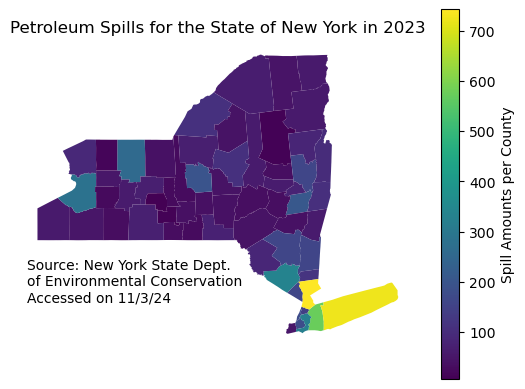

In [36]:
# a. Create a choropleth map
ny_counties = gpd.GeoDataFrame(ny_counties, geometry = 'geometry')
ny_counties.crs = 'EPSG:4269'

ax = ny_counties.plot(column = 'n_spills', legend = True, cmap = 'viridis', legend_kwds={"label":"Spill Amounts per County"})
ax.set_axis_off()
ax.set_title('Petroleum Spills for the State of New York in 2023',
             fontsize = 12)
ax.annotate('Source: New York State Dept.\nof Environmental Conservation\nAccessed on 11/3/24', xy=(-80,41))


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

In [37]:
# Top 3 counties with most petroleum spills
top3 = spills_per_county.sort_values(by = "n_spills", ascending=False)
top3.head(3)

,county,n_spills
61,Westchester,743
52,Suffolk,723
29,Nassau,576


This map shows the number of reported petroleum spills per county in the state of New York, for the year 2023. The county with the highest amount of reported spills is Westchester county with 743 reported spills, Suffolk county with 723 reported spills, and Nassau county with 576 reported spills. 